In [2]:
import zipfile
with zipfile.ZipFile("dogs-vs-cats.zip") as zip_ref:
    zip_ref.extractall("dogs-vs-cats")
    
with zipfile.ZipFile("test1.zip") as zip_ref:
    zip_ref.extractall("test")
    
with zipfile.ZipFile("train.zip") as zip_ref:
    zip_ref.extractall("train")

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
#define train and test generators
train_datagen=ImageDataGenerator(rescale=1/255,
                                 rotation_range=40,
                                 width_shift_range=0.2,
                                 height_shift_range=0.2,
                                 shear_range=0.2,
                                 horizontal_flip=True,
                                 fill_mode='nearest')

In [5]:
test_datagen=ImageDataGenerator(rescale=1/255)

In [6]:
#create train and test generators
train_generator=train_datagen.flow_from_directory("train",target_size=(200,200),batch_size=128,class_mode="binary")
test_generator=train_datagen.flow_from_directory("test",target_size=(200,200),batch_size=128,class_mode="binary")

Found 25000 images belonging to 1 classes.
Found 12500 images belonging to 1 classes.


In [7]:
#build model
from keras.layers.convolutional import Conv2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Dropout,Flatten

In [8]:
model=Sequential()

model.add(Conv2D(64,kernel_size=(3,3),input_shape=(200,200,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32,kernel_size=(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32,kernel_size=(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(16,kernel_size=(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dense(64,activation="relu"))
model.add(Dense(1,activation="sigmoid"))

In [9]:
from tensorflow.keras.metrics import Precision,Recall
#compile the model
model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy",Precision(),Recall()])

In [10]:
from livelossplot import PlotLossesKerasTF

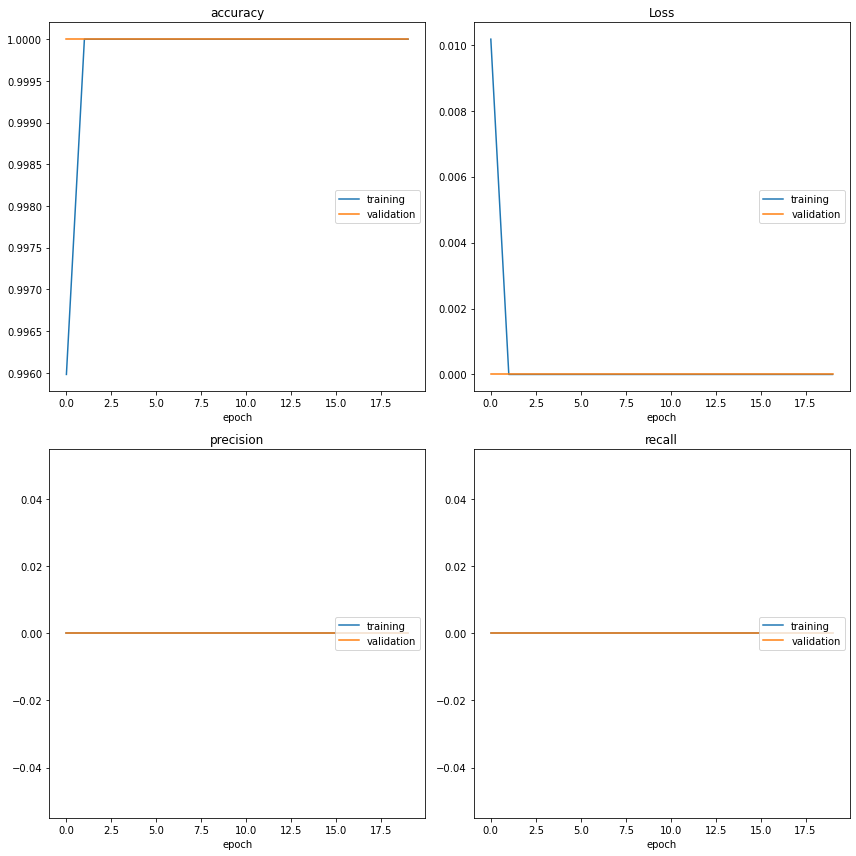

accuracy
	training         	 (min:    0.996, max:    1.000, cur:    1.000)
	validation       	 (min:    1.000, max:    1.000, cur:    1.000)
Loss
	training         	 (min:    0.000, max:    0.010, cur:    0.000)
	validation       	 (min:    0.000, max:    0.000, cur:    0.000)
precision
	training         	 (min:    0.000, max:    0.000, cur:    0.000)
	validation       	 (min:    0.000, max:    0.000, cur:    0.000)
recall
	training         	 (min:    0.000, max:    0.000, cur:    0.000)
	validation       	 (min:    0.000, max:    0.000, cur:    0.000)
195/195 [==============================] - 2276s 12s/step - loss: 0.0000e+00 - accuracy: 1.0000 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.0000e+00 - val_accuracy: 1.0000 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00


In [11]:
#train the model
model.fit(train_generator,steps_per_epoch=25000//128,epochs=20,validation_data=test_generator,validation_steps=12500//128,
          callbacks=[PlotLossesKerasTF()])
## steps per epoch is number of images/batch size
## batch size is the hyperparameter
## it will be more accurate by increasing the batch size

In [16]:
model.save("DogCatIdentificationModel.h5")